## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Comb_df=mouse_metadata.merge(study_results, how='left', on='Mouse ID', sort=False)

# Display the data table for preview
Comb_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Number_mouse= Comb_df["Mouse ID"].count()
Number_mouse

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = Comb_df.loc[Comb_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [4]:
#Get all the data for the duplicate mouse ID.
all_dup_mouse = Comb_df.loc[Comb_df['Mouse ID'] =='g989',:]
all_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
ID_mouse_clean = Comb_df[Comb_df['Mouse ID'].isin(dup_mouse_id) ==False]
ID_mouse_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
Mouse_row = ID_mouse_clean["Mouse ID"].value_counts()
clean_mouse = len(Mouse_row)
clean_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tv_mean = ID_mouse_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tv_median = ID_mouse_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tv_variance = ID_mouse_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tv_stndev =ID_mouse_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tv_SEM = ID_mouse_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

assembled_df=pd.DataFrame(tv_mean)
assembled_df['Median Tumor Volume']=tv_median
assembled_df['Tumor Volume Variance']=tv_variance
assembled_df['Tumor Volume Std. Dev.']=tv_stndev
assembled_df['Tumor Volume St. Err.']=tv_SEM

assembled_df=assembled_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume', 
})

assembled_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
assembled_df=pd.DataFrame(tv_mean)
assembled_df['median']=tv_median
assembled_df['var']=tv_variance
assembled_df['std']=tv_stndev
assembled_df['sem']=tv_SEM

assembled_df=assembled_df.rename(columns={'Tumor Volume (mm3)': 'mean', 
})

assembled_df
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

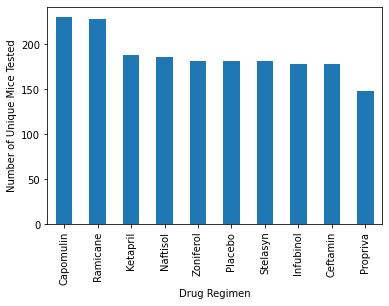

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
BP_unique_mice=ID_mouse_clean['Drug Regimen'].value_counts().plot.bar()

BP_unique_mice.set_xlabel('Drug Regimen')
BP_unique_mice.set_ylabel("Number of Unique Mice Tested")


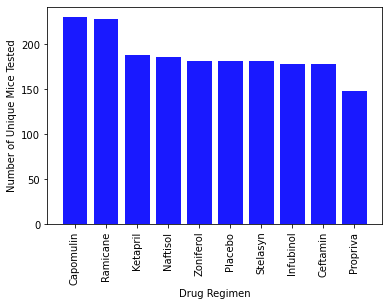

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
BP_unique_mice=ID_mouse_clean['Drug Regimen'].value_counts()
x_axis = BP_unique_mice.index.values
y_axis = BP_unique_mice.values

plt.bar(x_axis, y_axis, align='center',alpha=0.9, color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

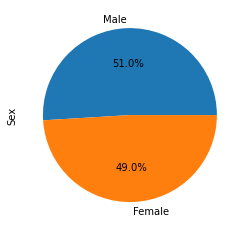

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fem_data= ID_mouse_clean["Sex"].value_counts()
fem_data.plot.pie(autopct="%1.1f%%")
plt.show

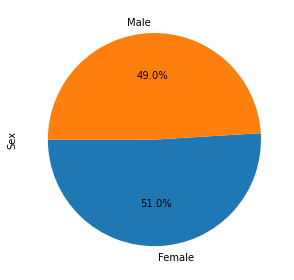

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(fem_data,labels=('Female', 'Male'), startangle = 180, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Cap_df = ID_mouse_clean.loc[ID_mouse_clean["Drug Regimen"] == "Capomulin",:]
Ram_df = ID_mouse_clean.loc[ID_mouse_clean["Drug Regimen"] == "Ramicane", :]
Infub_df = ID_mouse_clean.loc[ID_mouse_clean["Drug Regimen"] == "Infubinol", :]
Ceft_df = ID_mouse_clean.loc[ID_mouse_clean["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = ID_mouse_clean.groupby('Mouse ID')['Timepoint'].max()
greatest_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
total_df = pd.merge(ID_mouse_clean, greatest_tp, on=('Mouse ID','Timepoint'), how='right')
total_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
cap=[]
ram=[]
inf=[]
cef=[]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for index, row in total_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drugs[1]:
        ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drugs[2]:
        inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drugs[3]:
        cef.append(row['Tumor Volume (mm3)'])
        
   # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
drug_list_df = pd.DataFrame({"Capomulin": cap,
                            drugs[1]: ram,
                            drugs[2]: inf,
                            drugs[3]: cef
                            })
drug_list_df
      
    # Determine outliers using upper and lower bounds

quart_cap = drug_list_df[drugs[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)

quart_ram = drug_list_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)

quart_inf = drug_list_df[drugs[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)

quart_cef = drug_list_df[drugs[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)

out_list = pd.DataFrame({'Name of Treatment': drugs,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        })
out_list
out_list_group = out_list.groupby('Name of Treatment')
out_list_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound
Name of Treatment,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664


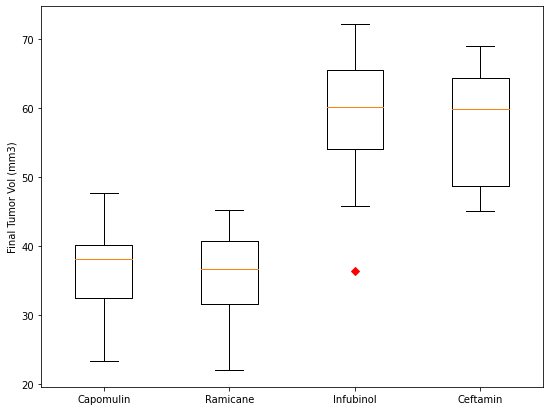

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplt_final = [drug_list_df[drugs[0]],
                drug_list_df[drugs[1]],
                drug_list_df[drugs[2]],
                drug_list_df[drugs[3]]
               ]
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_ylabel('Final Tumor Vol (mm3)') 
ax.boxplot(boxplt_final, 0, "rD")
plt.xticks([1,2,3,4], drugs) 
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

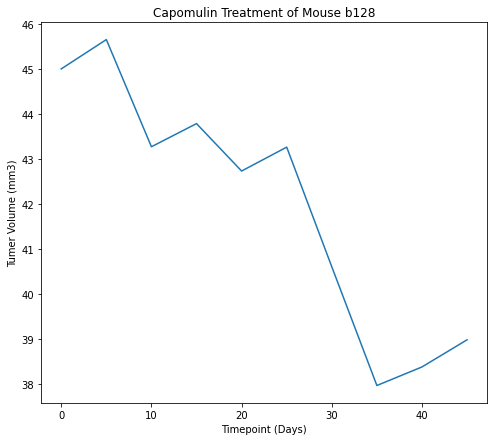

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_mouse_df = Cap_df.loc[Cap_df["Mouse ID"] =="b128"]
cap_mouse_df
plt.plot(cap_mouse_df['Timepoint'], cap_mouse_df['Tumor Volume (mm3)'])


plt.title('Capomulin Treatment of Mouse b128')
plt.plot(x_axis,Tumvol, linewidth=2,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumer Volume (mm3)')
plt.rcParams["figure.figsize"] = [8,7]
plt.show()



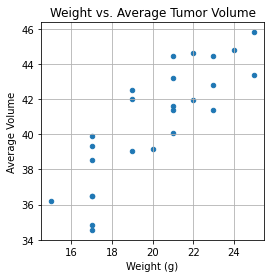

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Cap_df.head()

cap_id_mouse = Cap_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_id_mouse.head()

avg_cap_tumor = pd.DataFrame(cap_id_mouse.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap_tumor.head()

avg_cap_tumor = avg_cap_tumor.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_cap_tumor.head()

avg_cap_tumor.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [83]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cal_correl = st.pearsonr(cap_id_mouse['Weight (g)'], cap_id_mouse['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(cal_correl[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.53


The r-squared is: 0.5256995552077166
The equation of the regressing line is: y = 0.96x + 21.49


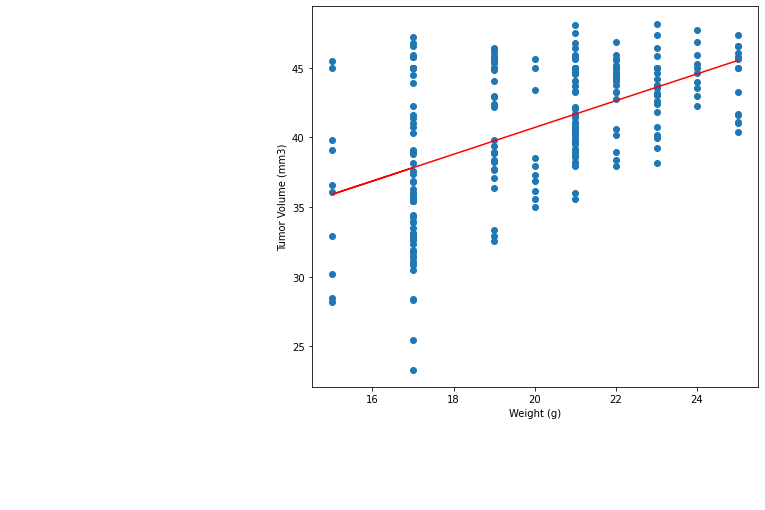

In [96]:
from scipy.stats import linregress

x_values = cap_id_mouse['Weight (g)']
y_values = cap_id_mouse['Tumor Volume (mm3)']

(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values* slope + intercept
line_eq= f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,14), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regressing line is: {line_eq}")

plt.show()